In [16]:
import numpy as np
import matplotlib.pyplot as plt
import src.network as network
import src.network_utils as net_utils

# Universal Approximation

The Universal Approximation Theorem for neural networks states that a neural network can be used to approximate any function up to an arbitrary precision. The following document presents a visualization of the Universal Approximation Theorem and demonstrates the essential train of thought behind the theorem. The full proof requires expansive knowledge of functional analysis, but the theorem will be demonstrated below.

## The 2 layer case

We will first give a brief overview of the 2 layer case as it is much easier to construct the function of interest with an additional layer.  

Consider an arbitrary disjoint classification region composed of a set of disjoint convex regions. The basic idea is to construct individual networks to classify each region, then add a second layer which applies a weighted sum to the regions. Using the human approach shown in `concave_classification.ipynb` we can easily make a convex region as shown below. Note that for simplicity, we will be using the Heaviside step activation function rather than the sigmoid function. As previously mentioned, with large enough weights, the sigmoid activation function approximately converges to the Heaviside step function.

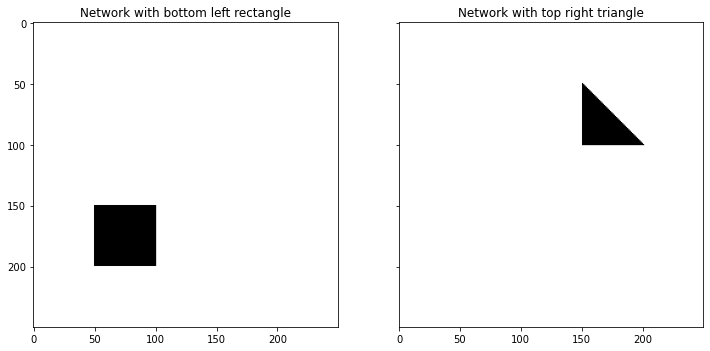

In [13]:
square_net = network.Network([network.Linear(2,4), network.Step(), network.Linear(4,1), network.Step()])
square_net.layers[0].weights = np.array([[0, 1],
                                         [1, 0],
                                         [0, -1],
                                         [-1, 0]])
square_net.layers[0].biases = np.array([[-0.2],
                                        [-0.2],
                                        [0.4],
                                        [0.4]])
square_net.layers[2].weights = np.array([1, 1, 1, 1])
square_net.layers[2].biases = -4

tri_net = network.Network([network.Linear(2,3), network.Step(), network.Linear(3,1), network.Step()])
tri_net.layers[0].weights = np.array([[0, 1],
                                      [1, 0],
                                      [-1, -1]])
tri_net.layers[0].biases = np.array([[-0.6],
                                     [-0.6],
                                     [1.4]])
tri_net.layers[2].weights = np.array([1, 1, 1])
tri_net.layers[2].biases = -3


square_net_arr = net_utils.visualize_2d_function(square_net.forward_prop, [250, 250], convert=True)
tri_net_arr = net_utils.visualize_2d_function(tri_net.forward_prop, [250, 250], convert=True)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1.imshow(square_net_arr, cmap='gray_r')
ax1.set_title('Network with bottom left rectangle')
ax2.imshow(tri_net_arr, cmap='gray_r')
ax2.set_title('Network with top right triangle')
plt.show()

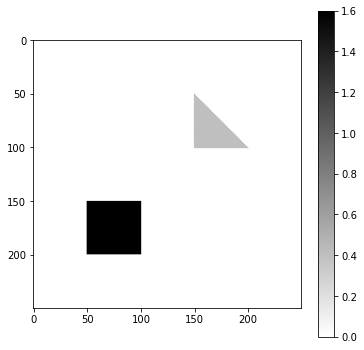

In [15]:
combined_net = network.Network([network.Linear(2,7), 
                                network.Step(), 
                                network.Linear(7,2), 
                                network.Step(),
                                network.Linear(2,1)])
combined_net.layers[0].weights = np.array([[0, 1],
                                           [1, 0],
                                           [0, -1],
                                           [-1, 0],
                                           [0, 1],
                                           [1, 0],
                                           [-1, -1]])
combined_net.layers[0].biases = np.array([[-0.2],
                                          [-0.2],
                                          [0.4],
                                          [0.4],
                                          [-0.6],
                                          [-0.6],
                                          [1.4]])
combined_net.layers[2].weights = np.array([[1, 1, 1, 1, 0, 0, 0],
                                           [0, 0, 0, 0, 1, 1, 1]])
combined_net.layers[2].biases = np.array([[-4],
                                          [-3]])
combined_net.layers[4].weights = np.array([[1.6, 0.4]])
combined_net.layers[4].biases = np.array([[0]])

combined_net_arr = net_utils.visualize_2d_function(combined_net.forward_prop, [250, 250], convert=True)
plt.figure(figsize=(6,6))
plt.imshow(combined_net_arr, cmap='gray_r')
plt.colorbar()
plt.show()

As shown in the combined network above, it is relatively easy to combine a set of single layer networks which classify convex regions into a two layer network with a weighted sum of convex regions. Hence, it is easy to see that any arbitrary function can be divided into a finite number of convex regions of a given value and approximated up to an arbitrary precision using this method.  

However, without the second network layer, it is difficult to see how this can be accomplished. Below, we discuss the precise definition of the Universal Approximation Theorem for single layer networks and visualize how they many be constructed.

## Precise Definition

Let $ I_n $ be the n-dimensional hypercube $ [0,1]^n $ and let $ S_n \subset I_n $ be the unit n-sphere.  

__Definition__. We say that a function $ \sigma: \mathbb{R} \rightarrow \mathbb{R} $ is sigmoidal if  

$$ \sigma(t) \rightarrow
\left\{
\begin{array}{ll}
      1, & \text{as } t \rightarrow +\infty \\
      0, & \text{as } t \rightarrow -\infty \\
\end{array} 
\right.
$$  

__Theorem__ [Cybenko, G. 1989]. Let $ \sigma $ be a bounded measurable sigmoidal function. Then finite sums of the form  

$$ G(x) = \sum_{j=1}^N \alpha_j \sigma(y_j^Tx + \theta_j) $$  

are dense in $ L^1(I_n) $. In other words, given any $ f \in L^1(I_n) $ and $ \epsilon > 0 $, there is a sum, $ G(x) $, of the above form for which  

$$ \|G-f\|_{L^1} = \int_{I_n} |G(x)-f(x)|\mathop{dx} < \epsilon $$  

Hence, this theorem states that any function in $ L^1(I_n) $, which are the functions of interest in a neural network approximation, can be approximated by sums of the form above up to an arbitrary precision.  

## Problem Definition

Consider the function $ G: I_n \rightarrow \mathbb{R} $, such that  

$$ G(\vec{x}) = \sum_{j=1}^N \alpha_j \sigma(\vec{y_j} \cdot \vec{x} + \theta_j) $$  

where $ \sigma $ is the Heaviside step function,  

$$ \sigma(t) =
\left\{
\begin{array}{ll}
      0, & t < 0 \\
      1, & t \ge 0 \\
\end{array} 
\right.
$$

Consider also the function $ F: I_n \rightarrow \mathbb{R} $ such that  

$$ F(\vec{x}) =
\left\{
\begin{array}{ll}
      1, & \text{if  } \vec{x} \in C \\
      0, & \text{if  } \vec{x} \notin C \\
\end{array} 
\right.
$$

where $ C \subset I_n $ is the region enclosed by the n-sphere with center $ \vec{\gamma} $ and radius r, entirely contained in $ I_n $  

In other words, $ F $ is a binary classifier for the region C. Since $ F \in L^1(I_n) $, there must be some sum, $ G(\vec{x}) $ such that $ \|G-F\|_{L^1} < \epsilon $ for any $ \epsilon > 0 $.  

We will construct $ G $ below and extend our construction to the case of arbitrarily many disjoint hyperspheres.

## Function Construction

To construct $ G $, we first chose $ k $ uniformly or randomly distributed points, $ p_1, p_2, ..., p_k $, from $ S_n $. For each point, $ p_j $,  we construct the vector $ \vec{y_j} = -\vec{p_j} $. We then add a bias $ \theta_j $ such that the linear equation $ \vec{y_j} \cdot \vec{x} + \theta_j $ forms a hyperplane in $ I_n $, splitting the region into two half spaces $ H_j^1 \text{ and } H_j^0 $ where $ C \in H_j^1 $ and

$$
\begin{array}{ll}
      \vec{y_j} \cdot \vec{x} + \theta_j \ge 0, & \text{if  } \vec{x} \in H_j^1 \\
      \vec{y_j} \cdot \vec{x} + \theta_j < 0, & \text{if  } \vec{x} \in H_j^0 \\
\end{array} 
$$

We then have that

$$ \sigma(\vec{y_j} \cdot \vec{x} + \theta_j) =
\left\{
\begin{array}{ll}
      1, & \text{if  } \vec{x} \in H_j^1 \\
      0, & \text{if  } \vec{x} \notin H_j^0 \\
\end{array} 
\right.
$$

This can be done since each vector, $ \vec{y_j} $ is tangential to the unit n-sphere. We can thus chose $ \theta_j $ such that $ \vec{y_j} \cdot \vec{x_j^0} + \theta_j = 0 $ where $ \vec{x_j^0} $ is the corresponding point on $ \partial C $ given by

$$ \vec{x_j^0} = \vec{\gamma} - r\vec{y_j} $$

Solving for $ \theta_j $ and using the fact that $ \vec{y_j} \cdot \vec{y_j} = 1 $, we find

$$ \theta_j = r - \vec{y_j} \cdot \vec{\gamma} $$

Therefore, we have that

$$ \hat{G}(\vec{x}) = \sum_{j=1}^k \sigma(\vec{y_j} \cdot \vec{x} + \theta_j) = k \text{  if  } \vec{x} \in C $$

For the case when $ \vec{x} \notin C $, we must determine the ratio of hyperplanes, $ H_j^1 $ such that $ \vec{x} \in H_j^1 $. For $ k $ sufficiently large and a uniform sampling of points, $ p_j $, $ \hat{G}(\vec{x}) = ka_n $ where $ a_n $ is the ratio of the n-dimensional volume of $ \partial{C} $ that sees $ \vec{x} $ to the total volume.

## Determining $ a_n $

Let $ A_n^{cap}(r) $ be the n-dimensional volume of the cap on the n-sphere of radius $ r $, with angle $ \phi $ and let $ A_n(r) $ be the total n-dimensional volume of the n-sphere of radius $ r $. Then, 

$$ a_n = 1 - \frac{A_n^{cap}(r)}{A_n(r)} = 
1 - \frac{ \frac{2 \pi^{\frac{n-1}{2}}}{\Gamma(\frac{n-1}{2})} r^{n-1} \int_0^\phi 
\sin^{n-2} \theta \mathop{d\theta} }
{ \frac{2 \pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2})}r^{n-1} } $$ 

$$ = 1 - d(n) \int_0^\phi \sin^{n-2} \theta \mathop{d\theta} $$

where

$$ d(n) = \frac{ \Gamma(\frac{n}{2}) }{ \sqrt{\pi} \Gamma(\frac{n-1}{2}) } $$

By projecting the n-sphere into the 2d case, it is clear to see that $ \phi = \arccos \left( \frac{r}{|\vec{x} - \vec{\gamma}|} \right) $. We therefore have

$$ a_2(r) = 1 - \frac{1}{\pi} \arccos \left( \frac{r}{|\vec{x} - \vec{\gamma}|} \right) $$

$$ a_3(r) = \frac{1}{2} \left( 1 + \frac{r}{|\vec{x} - \vec{\gamma}|} \right) $$

$$ a_4(r) = 1 - \frac{1}{\pi} \arccos \left( \frac{r}{|\vec{x} - \vec{\gamma}|} \right) 
+ \frac{1}{2\pi} \sin \left( 2 \arccos \left( \frac{r}{|\vec{x} - \vec{\gamma}|} \right) \right)$$

$$ a_5(r) = \frac{1}{2} \left( 1 + \frac{3}{2} \left( \frac{r}{|\vec{x} - \vec{\gamma}|} \right) 
- \frac{1}{2} \left( \frac{r}{|\vec{x} - \vec{\gamma}|} \right)^2 \right) $$

Here, we conjecture that for any $ n $, $ a_n(r) \rightarrow \frac{1}{2} $ for $ r $ sufficiently small.

## Determining $ G(\vec{x}) $

For $ r $ sufficiently small, we therefore have 

$$ \hat{G}(\vec{x}) \approx
\left\{
\begin{array}{ll}
      k, & \text{if  } \vec{x} \in C \\
      \frac{k}{2}, & \text{if  } \vec{x} \notin C \\
\end{array} 
\right.
$$

Thus let

$$ G(\vec{x}) = \frac{2}{k} \hat{G}(\vec{x}) - 1 
= \sum_{j=1}^k \frac{2}{k} \sigma (\vec{y_j} \cdot \vec{x} + \theta_j) - 1 $$

However, note that $ -1 = -\sigma(1) = -\sigma(\vec{0} \cdot \vec{x} + 1) $. Therefore,

$$ G(\vec{x}) = \sum_{j=1}^{k+1} \alpha_j \sigma( \vec{y_j} \cdot \vec{x} + \theta_j ) $$

where

$$ \alpha_1, ..., \alpha_k = \frac{k}{2}, \; \; \alpha_{k+1} = -1 $$

$$ \vec{y_1}, ..., \vec{y_k} = -\vec{p_1}, ..., -\vec{p_k}, \; \; \vec{y_{k+1}}=\vec{0} $$

$$ \theta_1, ..., \theta_k = r - \vec{y_1} \cdot \vec{\gamma}, ..., r - \vec{y_k} \cdot \vec{\gamma}, \; \;
\theta_{k+1} = 1 $$

and

$$ G(\vec{x}) \approx
\left\{
\begin{array}{ll}
      1, & \text{if  } \vec{x} \in C \\
      0, & \text{if  } \vec{x} \notin C \\
\end{array} 
\right.
$$

## Arbitrarily Many Hyperspheres

Let $ C_1, C_2, ..., C_M $ be $ M $ disjoint regions enclosed by n-spheres such that $ C_i \in I_n $ for $ i=1, 2, ..., M $ and $ \cap_{i=1}^M C_i = \emptyset $  

Let $ D = d_1, d_2, ..., d_M \in \mathbb{R} $ be scalar values such that we can construct a function $ F: I_n \rightarrow \mathbb{R} $, where

$$ F(\vec{x}) =
\left\{
\begin{array}{ll}
      d_i, & \text{if  } \vec{x} \in C_i \\
      0, & \text{if  } \vec{x} \notin \cup_{i=1}^M C_i \\
\end{array} 
\right.
$$

As shown above, we construct $ M $ sums of the form 

$$ \hat{G_i}(\vec{x}) = \sum_{j=1}^{d_ik+1} \sigma(\vec{y_{ij}} \cdot \vec{x} + \theta_{ij}) $$

such that

$$ \hat{G_i}(\vec{x}) =
\left\{
\begin{array}{ll}
      d_ik, & \text{if  } \vec{x} \in C_i \\
      d_i\frac{k}{2}, & \text{if  } \vec{x} \notin C_i \\
\end{array} 
\right.
$$

Now, we have

$$ G(\vec{x}) = \frac{2}{k} \sum_{i=1}^M \hat{G_i}(\vec{x}) - \sum_{j=1}^M d_j \approx
\left\{
\begin{array}{ll}
      \frac{2}{k} \left( d_ik + \sum_{j=1, j \ne i}^M \frac{d_jk}{2} \right) - \sum_{j=1}^M d_j, 
      & \text{if } \vec{x} \in C_i \\
      \frac{2}{k} \sum_{j=1}^M \frac{d_jk}{2} - \sum_{j=1}^M d_j, 
      & \text{if } \vec{x} \notin \cup_{i=1}^M C_i \\
\end{array} 
\right.
$$

Simplifying the above equation, we have that

$$ G(\vec{x}) \approx
\left\{
\begin{array}{ll}
      d_i, & \text{if } \vec{x} \in C_i \\
      0, & \text{if } \vec{x} \notin \cup_{i=1}^M C_i \\
\end{array} 
\right. = F(\vec{x})
$$ 

Hence, 

$$ G(\vec{x}) = \sum_{j=1}^{k'+1} \alpha_i \sigma(\vec{y_i} \cdot \vec{x} + \theta_i) $$

where

$$ k' = k \sum_{j=1}^M d_j + M, \; \; \alpha_{k'+1} = -\sum_{j=1}^M d_j $$



## Visualization

Using the procedure outlined above, we will demonstrate how to construct the function 

$$ F(\vec{x}) =
\left\{
\begin{array}{ll}
      1, & \text{if } \vec{x} \in C_1 \\
      2, & \text{if } \vec{x} \in C_2 \\
      0, & \text{if } \vec{x} \notin C_1 \cup C_2 \\
\end{array} 
\right.
$$

in the 2-dimensional case. We will first demonstrate how the 2-sphere is approximated with an increasing number of hyperplanes. We then construct 2 networks for disjoint regions and combine them together into a single network with a single layer.  

To visually understand how an arbitrary function could be approximated in this way, consider a 2-dimensional function, $ f: I_2 \rightarrow \mathbb{R} $. We choose a small circular region in $ I_2 $ and create a network, $ G_0(x, y) $ which approximates the value of $ f $ over that region. We then consider the new function $ f - G_0 $ which will have a smaller error $ \int_{I_2} |f - G_0| dxdy $. We can then continue to subtract more and more networks $ G_j(x, y) $ unitll the error term $ \int_{I_2} |f - \sum_{j=1}^k G_j| dxdy < \epsilon $ for some $ \epsilon > 0 $.

In [25]:
def create_net(n, b, r, step=False, bias_ratio=-3/4):
    thetas = [2*np.pi*i/n for i in range(n)]
    w = -1*np.array([np.cos(thetas), np.sin(thetas)]).T
    g = (-b[0]*w[:,0]-b[1]*w[:,1]+r).reshape(n,1)
    bias = 0
    
    layers = [network.Linear(2, n), network.Step(), network.Linear(n, 1)]
    if step:
        layers.append(network.Step())
        bias = bias_ratio*n
    net = network.Network(layers)
    net.layers[0].weights = w
    net.layers[0].biases = g
    net.layers[2].weights = np.ones([1,n])
    net.layers[2].biases = np.array([[bias]])
    
    return net

def combine_nets(nets, step=False, bias=0):
    n = 0
    weights = []
    biases = []
    for net in nets:
        w = net.layers[0].weights
        b = net.layers[0].biases
        n += w.shape[0]
        weights.append(w)
        biases.append(b)
        
    weights = np.concatenate(weights, axis=0)
    biases = np.concatenate(biases, axis=0)
    
    layers = [network.Linear(2, n), network.Step(), network.Linear(n, 1)]
    if step:
        layers.append(network.Step())
    combined_net = network.Network(layers)
    combined_net.layers[0].weights = weights
    combined_net.layers[0].biases = biases
    combined_net.layers[2].weights = np.ones([1, n])
    combined_net.layers[2].biases = np.array([bias])
    
    return combined_net

def visualize_3d_network(func, n):
    x = np.linspace(0, 1, n[0])
    y = np.linspace(0, 1, n[1])
    xx, yy = np.meshgrid(x, y)
    zz = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
                zz[i, j] = func(np.reshape([xx[i,j], yy[i,j]], (2, 1)))
    return xx, yy, zz

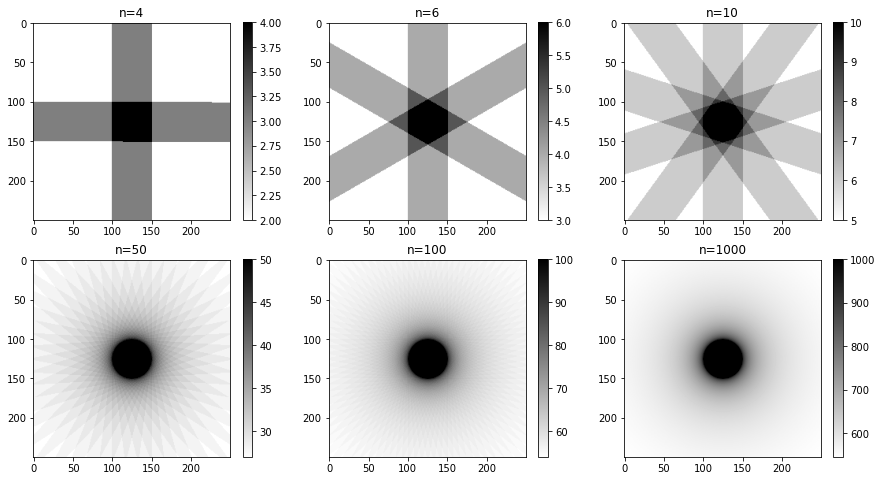

In [21]:
poly_net_arrs = []
hyperplanes = [4, 6, 10, 50, 100, 1000]

poly_net4 = create_net(4, [0.5, 0.5], 0.1)
poly_net6 = create_net(6, [0.5, 0.5], 0.1)
poly_net10 = create_net(10, [0.5, 0.5], 0.1)
poly_net50 = create_net(50, [0.5, 0.5], 0.1)
poly_net100 = create_net(100, [0.5, 0.5], 0.1)
poly_net1000 = create_net(1000, [0.5, 0.5], 0.1)

poly_net_arrs.append(net_utils.visualize_2d_function(poly_net4.forward_prop, [250, 250], convert=True))
poly_net_arrs.append(net_utils.visualize_2d_function(poly_net6.forward_prop, [250, 250], convert=True))
poly_net_arrs.append(net_utils.visualize_2d_function(poly_net10.forward_prop, [250, 250], convert=True))
poly_net_arrs.append(net_utils.visualize_2d_function(poly_net50.forward_prop, [250, 250], convert=True))
poly_net_arrs.append(net_utils.visualize_2d_function(poly_net100.forward_prop, [250, 250], convert=True))
poly_net_arrs.append(net_utils.visualize_2d_function(poly_net1000.forward_prop, [250, 250], convert=True))

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for index in range(len(hyperplanes)):
    i = index // 3
    j = index % 3
    im = axs[i,j].imshow(poly_net_arrs[index], cmap='gray_r')
    axs[i,j].set_title(f'n={hyperplanes[index]}')
    plt.colorbar(im, ax=axs[i,j])

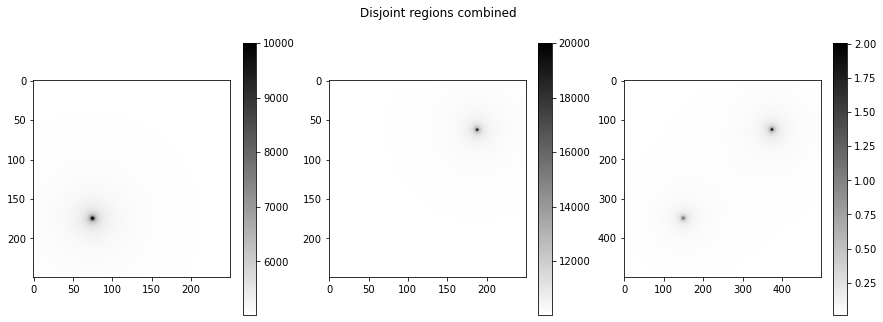

In [24]:
net_arrs = []
K = 10000

net1 = create_net(K, [0.3, 0.3], 0.0075)
net_arrs.append(net_utils.visualize_2d_function(net1.forward_prop, [250, 250], convert=True))

net2 = create_net(2*K, [0.75, 0.75], 0.005)
net_arrs.append(net_utils.visualize_2d_function(net2.forward_prop, [250, 250], convert=True))

new_net = combine_nets([net1, net2], step=False, bias=-3)
new_net.layers[2].weights *= 2/K
net_arrs.append(net_utils.visualize_2d_function(new_net.forward_prop, [500, 500], convert=True))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Disjoint regions combined')
for i in range(len(net_arrs)):
    im = axs[i].imshow(net_arrs[i], cmap='gray_r')
    plt.colorbar(im, ax=axs[i])

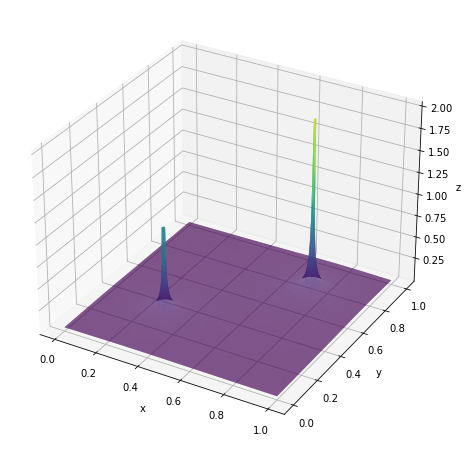

In [26]:
X, Y, Z = visualize_3d_network(new_net.forward_prop, [500, 500])
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
x_label = ax.set_xlabel('x')
y_label = ax.set_ylabel('y')
z_label = ax.set_zlabel('z')